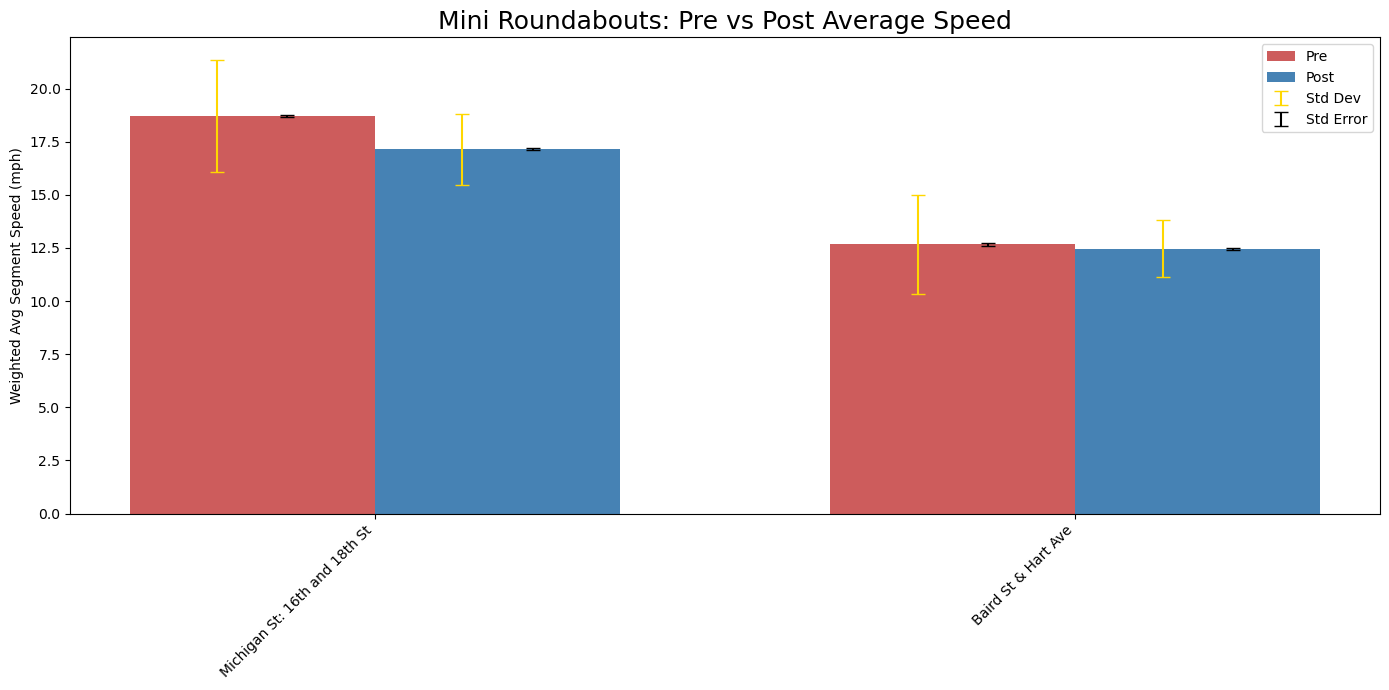

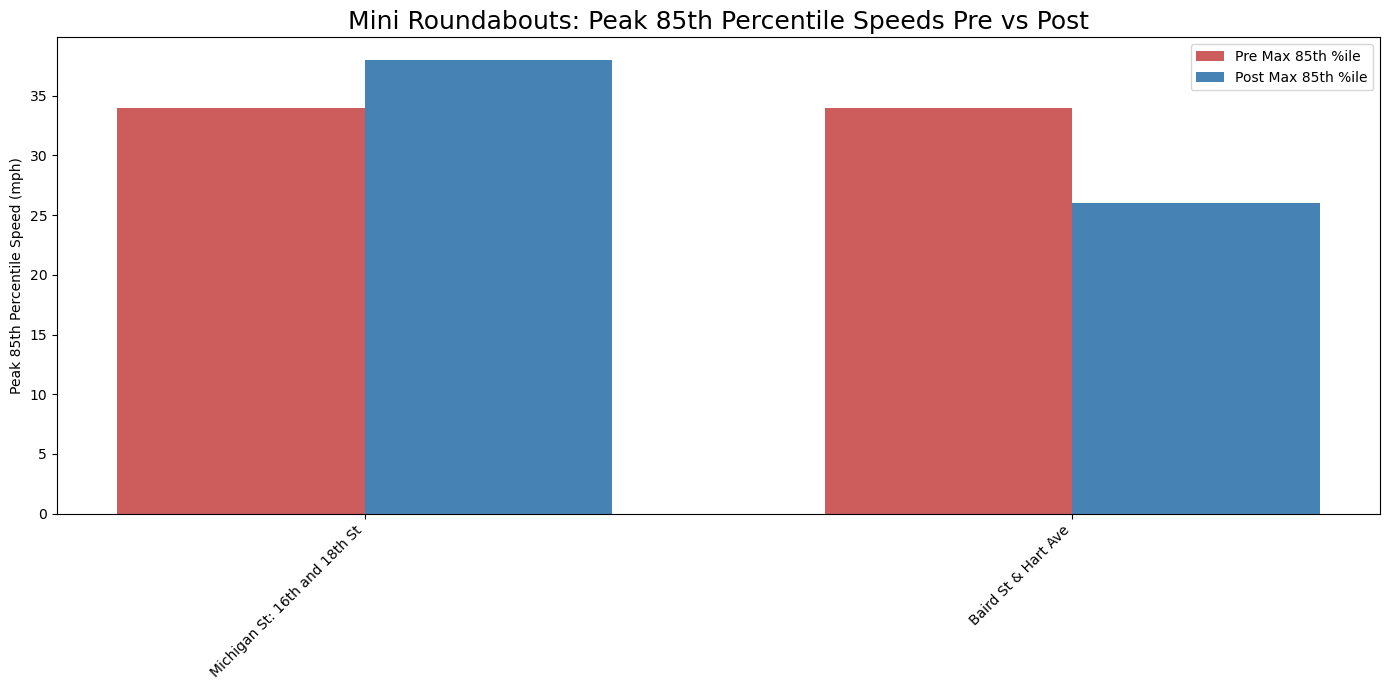

In [6]:
import os
import json
import matplotlib.pyplot as plt
import numpy as np

ordered_labels = ["Michigan St: 16th and 18th St",
                  "Baird St & Hart Ave"
]

summary_dir = 'results'
summary_dict = {}

for filename in os.listdir(summary_dir):
    if filename.endswith('_summary.json'):
        with open(os.path.join(summary_dir, filename), 'r') as f:
            data = json.load(f)
            summary_dict[data['Intersection']] = data

labels = [label for label in ordered_labels if label in summary_dict]
x = np.arange(len(labels))
width = 0.35
offset = 0.05

pre_means = [summary_dict[label]['Pre_Mean'] for label in labels]
post_means = [summary_dict[label]['Post_Mean'] for label in labels]
pre_stds = [summary_dict[label]['Pre_Std'] for label in labels]
post_stds = [summary_dict[label]['Post_Std'] for label in labels]
pre_ses = [summary_dict[label]['Pre_SE'] for label in labels]
post_ses = [summary_dict[label]['Post_SE'] for label in labels]

fig1, ax1 = plt.subplots(figsize=(14, 7))
ax1.bar(x - width/2, pre_means, width, label='Pre', color='indianred')
ax1.bar(x + width/2, post_means, width, label='Post', color='steelblue')
ax1.errorbar(x - width/2 - offset, pre_means, yerr=pre_stds, fmt='none', ecolor='gold', capsize=5, label='Std Dev')
ax1.errorbar(x - width/2 + offset, pre_means, yerr=pre_ses, fmt='none', ecolor='black', capsize=5, label='Std Error')
ax1.errorbar(x + width/2 - offset, post_means, yerr=post_stds, fmt='none', ecolor='gold', capsize=5)
ax1.errorbar(x + width/2 + offset, post_means, yerr=post_ses, fmt='none', ecolor='black', capsize=5)
ax1.set_ylabel('Weighted Avg Segment Speed (mph)')
ax1.set_title('Mini Roundabouts: Pre vs Post Average Speed', fontsize=18)
ax1.set_xticks(x)
ax1.set_xticklabels(labels, rotation=45, ha='right')
ax1.legend()
plt.tight_layout()
plt.savefig('roundabout_avg_comparison.png', dpi=300)
plt.show()



pre_max_85ths = [summary_dict[label]['Pre_Max_85th'] for label in labels]
post_max_85ths = [summary_dict[label]['Post_Max_85th'] for label in labels]

fig2, ax2 = plt.subplots(figsize=(14, 7))
ax2.bar(x - width/2, pre_max_85ths, width, label='Pre Max 85th %ile', color='indianred')
ax2.bar(x + width/2, post_max_85ths, width, label='Post Max 85th %ile', color='steelblue')
ax2.set_ylabel('Peak 85th Percentile Speed (mph)')
ax2.set_title('Mini Roundabouts: Peak 85th Percentile Speeds Pre vs Post', fontsize=18)
ax2.set_xticks(x)
ax2.set_xticklabels(labels, rotation=45, ha='right')
ax2.legend()
plt.tight_layout()
plt.savefig('awsc_max_85th_comparison.png', dpi=300)
plt.show()


In [5]:
pwd

'/home/jovyan/Capstone/Mini Roundabout/results'